<a href="https://colab.research.google.com/github/hemantborse/Practical-Application-3/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [20]:
#the bank dataset is result of data collected by a Portuguese bank using telephone as dominant marketing channel and sometime internet online banking channel.
#The dataset collected is related to 17 marketing campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures,MinMaxScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
import time

In [22]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Use CRISP-DM process model in this assignment



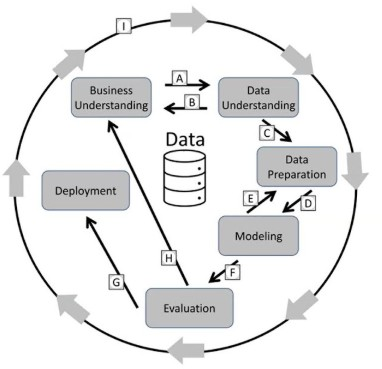

In [24]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### **Business understanding**: Based on marketing campaings (phone and internet banking) use available dataset to design/find a model that can explain success of a contact - If a client subscribes to the deposit. Model should increase campaign efficiency resulting in to better utilization of human resource time and efforts.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
#check if there are any null entries in the fratures/dataset
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [27]:
#check duplicates : Identify and remove redundant rows that can skew analysis.
df.duplicated().sum()
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [28]:
#Data Transformation

#df['default'].value_counts()
#df['housing'].value_counts()
#df['loan'].value_counts()
#df['y'].value_counts()
#df['poutcome'].value_counts()

In [29]:
# Map 'yes' to 1 and 'no' to 0 and 'unknown' to 2
#mapping = {'yes': 1, 'no': 0,'unknown':2}
#df['default'] = df['default'].replace({'yes': 1, 'no': 0,'unknown':2})
# Ensure the column is of integer type
#df['default'] = df['default'].astype(int)

#df['housing'] = df['housing'].replace({'yes': 1, 'no': 0,'unknown':2})
# Ensure the column is of integer type
#df['housing'] = df['housing'].astype(int)

#df['loan'] = df['loan'].replace({'yes': 1, 'no': 0,'unknown':2})
# Ensure the column is of integer type
#df['loan'] = df['loan'].astype(int)

#df['poutcome'] = df['poutcome'].replace({'success': 1, 'failure': 0,'nonexistent':2})
# Ensure the column is of integer type
#df['poutcome'] = df['poutcome'].astype(int)

#df['y'] = df['y'].replace({'yes': 1, 'no': 0})
#df['y'] = df['y'].astype(int)

#df.head()

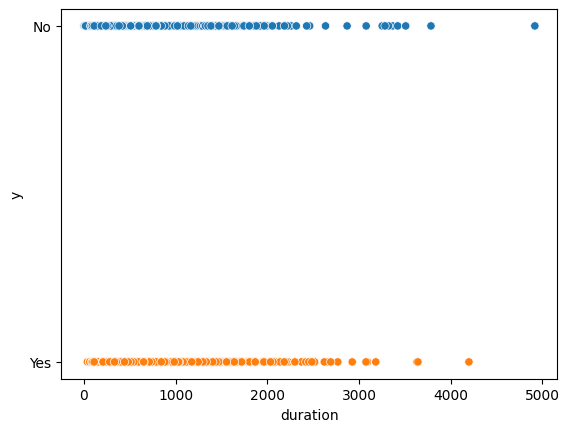

In [30]:
import seaborn as sns

y = np.where(df['y'] == 'yes', 1, 0)
sns.scatterplot(data = df, x = 'duration', y ='y', hue = 'y', legend = False)
plt.yticks([0, 1], ['No', 'Yes']);

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

# **Baseline Model training and performance**

In [32]:
from sklearn.dummy import DummyClassifier
dummy_clf = ''
baseline_score = ''
dummy_clf = DummyClassifier().fit(X_train, y_train)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [33]:
#beta_0 = ''
#beta_1 = ''
#clf = LogisticRegression().fit(df[['duration']], y)
#beta_0 = float(clf.intercept_[0])
#beta_1 = float(clf.coef_[0][0])

#def sigma(x, beta_0, beta_1):
 #   return 1/(1 + np.exp(-(beta_0 + beta_1*x)))

#sns.scatterplot(data = df, x = 'duration', y = y, hue = 'y', legend = False)
#plt.yticks([0, 1], ['No', 'Yes'])
#x = np.linspace(0,2600, 1000)
#plt.plot(x, sigma(x, beta_0, beta_1), '--', color = 'black', label = r'$\sigma(x)$')
#plt.legend(fontsize = 12)
#plt.title(r'Optimal Values of $\beta_0$ and $\beta_1$');

# **LogisticRegression Model training and performance**

In [43]:
#Create a selector object to select the columns with object datatype below
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

# build a pipeline lgr_pipe with named steps transformer, selector, and lgr that implement the column transformer, feature selector from above and a LogisticRegression estimator with random_state = 42 and max_iter = 1000.

lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
start_time = time.time()
lgr_pipe.fit(X_train, y_train)
train_time_logistic = time.time() - start_time
print(f"Training Time: {train_time_logistic:.4f} seconds")

Training Time: 4.5088 seconds


In [44]:
lgr_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e84f9f52c60>)])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

**Confusion Matrix and ROC Curve**

(np.int64(202), np.int64(534), np.float64(0.94))

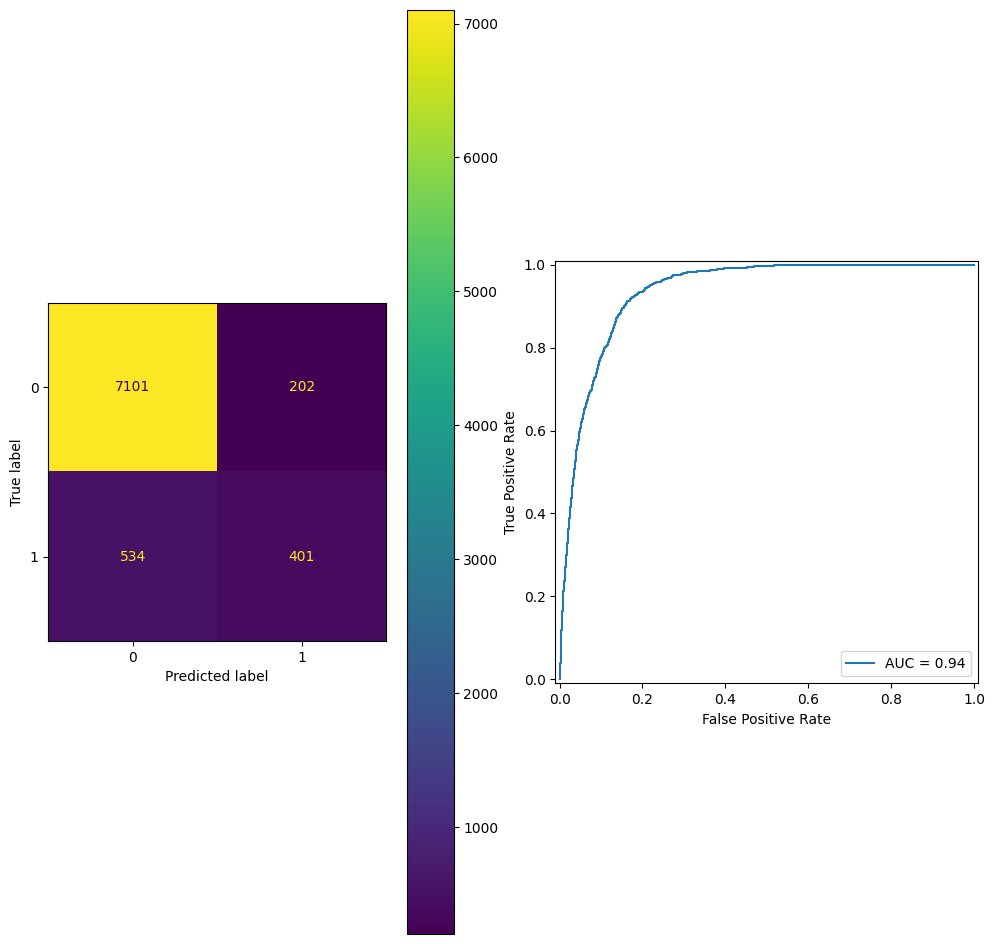

In [35]:
from sklearn.metrics import auc as skl_auc

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

preds = lgr_pipe.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, preds)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = lgr_pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label='yes')
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(roc_auc_value, 2)
fp, fn, auc

**Important Features**

In [36]:
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out()
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)
coef_df.head()

,feature,coefs
41,emp.var.rate,2.605767
25,month_mar,1.893613
37,duration,1.207256
42,cons.price.idx,1.090576
35,poutcome_success,0.903225


### Problem 9: Score the Model

What is the accuracy of your model?

In [37]:
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.8865015780529255


In [38]:
pipe_1_acc = lgr_pipe.score(X_test, y_test)
print(pipe_1_acc)

0.9106579266812334


***Model Score Outcome : Logistic Regression seems a little higher in score this means baseline model did a little better , however both seem super close to each other in terms of performance***

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

# **KNN Model training and performance**

In [60]:
#KNN
#  Define the Pipeline

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Explicitly defining selectors for better control
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include='number')

transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_selector),
    (StandardScaler(), num_selector),
    remainder='passthrough' # Keeps any other columns (like IDs) as they are
)


pipe = Pipeline([
    ('transformer', transformer),
    ('knn', KNeighborsClassifier())
])
# Define the Parameter Grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}
# Run Grid Search
grid = GridSearchCV(pipe, param_grid, cv=5)
start_time = time.time()
grid.fit(X_train, y_train)
train_time_KNN = time.time() - start_time
print(f"Training Time: {train_time_KNN:.4f} seconds")

# The original line below caused an error as 'scaler' was not a key in best_params_ and the transformer step was not meant to be replaced
# print(f"Best Transformer: {grid.best_params_['scaler']}")
print(f"Best KNN n_neighbors: {grid.best_params_['knn__n_neighbors']}")
print(f"Best KNN weights: {grid.best_params_['knn__weights']}")
print(f"Best Accuracy: {grid.best_score_:.4f}")

Training Time: 52.9731 seconds
Best KNN n_neighbors: 7
Best KNN weights: uniform
Best Accuracy: 0.9022


In [66]:
#Decison Tree

# Create the ColumnTransformer
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_selector),
    (StandardScaler(), num_selector),
    remainder='passthrough' # Keeps any other columns (like IDs) as they are
)

# Build the final Pipeline
dtpipe = Pipeline([
    ('transformer', transformer),
    ('dtree', DecisionTreeClassifier(max_depth=5, random_state=42))
])

start_time = time.time()
dtpipe.fit(X_train, y_train)
train_time_dt = time.time() - start_time
print(f"Training Time: {train_time_dt:.4f} seconds")

train_acc = dtpipe.score(X_train, y_train)
test_acc = dtpipe.score(X_test, y_test)

print(f"Decison Tree Training Accuracy: {train_acc:.2%}")
print(f"Decison Tree Test Accuracy: {test_acc:.2%}")

Training Time: 0.4955 seconds
Decison Tree Training Accuracy: 91.74%
Decison Tree Test Accuracy: 91.50%


# **SVM Model training and performance**

In [67]:
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_selector),
    (StandardScaler(), num_selector),
    remainder='passthrough' # Keeps any other columns (like IDs) as they are
)

# Build the final Pipeline
SVCpipe = Pipeline([
    ('transformer', transformer),
    ('svm', SVC(kernel='rbf', C=1.0))
])

start_time = time.time()
SVCpipe.fit(X_train, y_train)
train_time_dt = time.time() - start_time
print(f"Training Time: {train_time_dt:.4f} seconds")

train_acc = SVCpipe.score(X_train, y_train)
test_acc = SVCpipe.score(X_test, y_test)

print(f"SVC Training Accuracy: {train_acc:.2%}")
print(f"SVC Tree Test Accuracy: {test_acc:.2%}")

Training Time: 28.6128 seconds
SVC Training Accuracy: 92.17%
SVC Tree Test Accuracy: 91.11%


# **Lets Try all Models in a For loop and print performace result**

In [69]:
models = [
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_selector),
    (StandardScaler(), num_selector),
    remainder='passthrough'
)

results = []

for name, model in models:
    #Create a pipeline for each model
    pipe = Pipeline([
        ('transformer', transformer),
        ('clf', model)
    ])

    # Measure Train Time
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time

    # 3. Calculate Accuracies
    train_acc = pipe.score(X_train, y_train)
    test_acc = pipe.score(X_test, y_test)

    # 4. Append to results list
    results.append({
        'Model': name,
        'Train Time (s)': round(train_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })

# 5. Display as a Table
performance_df = pd.DataFrame(results)
print(performance_df.to_string(index=False))

        Model  Train Time (s)  Train Accuracy  Test Accuracy
          KNN          0.1757          0.9286         0.9030
Decision Tree          0.7380          1.0000         0.8843
          SVM         30.8260          0.9217         0.9111


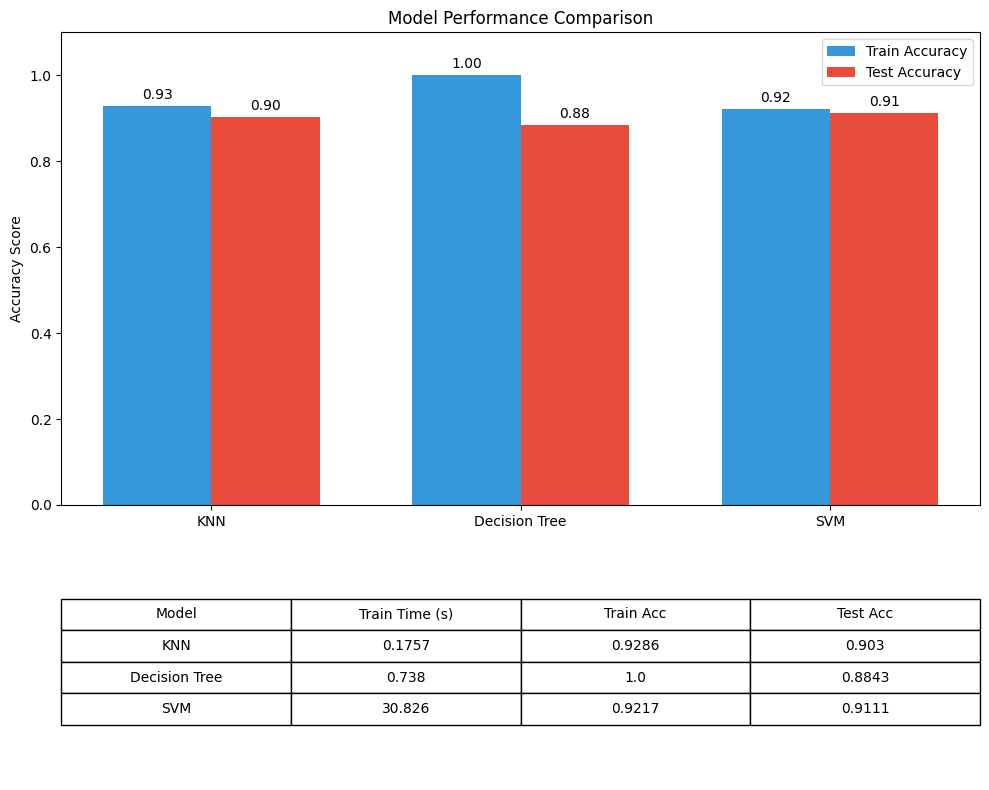

In [84]:
df = performance_df
models = df['Model']
train_acc = df['Train Accuracy']
test_acc = df['Test Accuracy']

# Subplots (Top for Bars, Bottom for Table)
fig, (ax_bar, ax_tbl) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

# --- Grouped Bar Chart ---
x = np.arange(len(models))
width = 0.35

rects1 = ax_bar.bar(x - width/2, train_acc, width, label='Train Accuracy', color='#3498db')
rects2 = ax_bar.bar(x + width/2, test_acc, width, label='Test Accuracy', color='#e74c3c')

ax_bar.set_ylabel('Accuracy Score')
ax_bar.set_title('Model Performance Comparison')
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(models)
ax_bar.set_ylim(0, 1.1)
ax_bar.legend(loc='upper right')

# Add values on top of bars
ax_bar.bar_label(rects1, padding=3, fmt='%.2f')
ax_bar.bar_label(rects2, padding=3, fmt='%.2f')

# --- Performance Table ---
ax_tbl.axis('off') # Hide axis for the table
table_data = df[['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy']].values
table = ax_tbl.table(cellText=table_data,
                     colLabels=['Model', 'Train Time (s)', 'Train Acc', 'Test Acc'],
                     cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

# KNN took least training time and better test accuracy as compare to Decision Tree where as SVM took longest training time but highest test accuracy

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [80]:

from sklearn.svm import LinearSVC
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_selector),
    (StandardScaler(), num_selector),
    remainder='passthrough' # Keeps any other columns (like IDs) as they are
)

# Define models and their specific hyperparameter grids
model_configs = [
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {'clf__n_neighbors': [3, 5, 11], 'clf__weights': ['uniform', 'distance']}
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'clf__max_depth': [None, 5, 10], 'clf__criterion': ['gini', 'entropy']}
    },
    {
            'name': 'SVM (Fast)',
    'model': LinearSVC(random_state=42),
    'params': {
        'clf__C': [0.1, 1, 10],
        'clf__loss': ['hinge', 'squared_hinge'], # hinge is the standard SVM loss
        'clf__max_iter': [2000] # Increase if it fails to converge
    }
       # 'name': 'SVM',
       # 'model': SVC(random_state=42),
      # 'model': LinearSVC(),
      #  'params': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
    }
]

In [81]:
performance_results = []

for config in model_configs:
    # Build pipeline
    pipe = Pipeline([
        ('transformer', transformer),
        ('clf', config['model'])
    ])

    # Setup Grid Search
    grid = GridSearchCV(pipe, config['params'], cv=5, n_jobs=-1)

    # Measure Training Time (includes the search process)
    start = time.time()
    grid.fit(X_train, y_train)
    train_time = time.time() - start

    # Extract best model performance
    best_model = grid.best_estimator_
    train_acc = best_model.score(X_train, y_train)
    test_acc = best_model.score(X_test, y_test)

    performance_results.append({
        'Model': config['name'],
        'Train Time (s)': round(train_time, 3),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4),
        'Best Params': grid.best_params_
    })

# 5. Display Table
df_results = pd.DataFrame(performance_results)
print(df_results[['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy']].to_string(index=False))

        Model  Train Time (s)  Train Accuracy  Test Accuracy
          KNN          47.322          1.0000         0.9052
Decision Tree          11.204          0.9174         0.9150
   SVM (Fast)          30.655          0.9096         0.9068


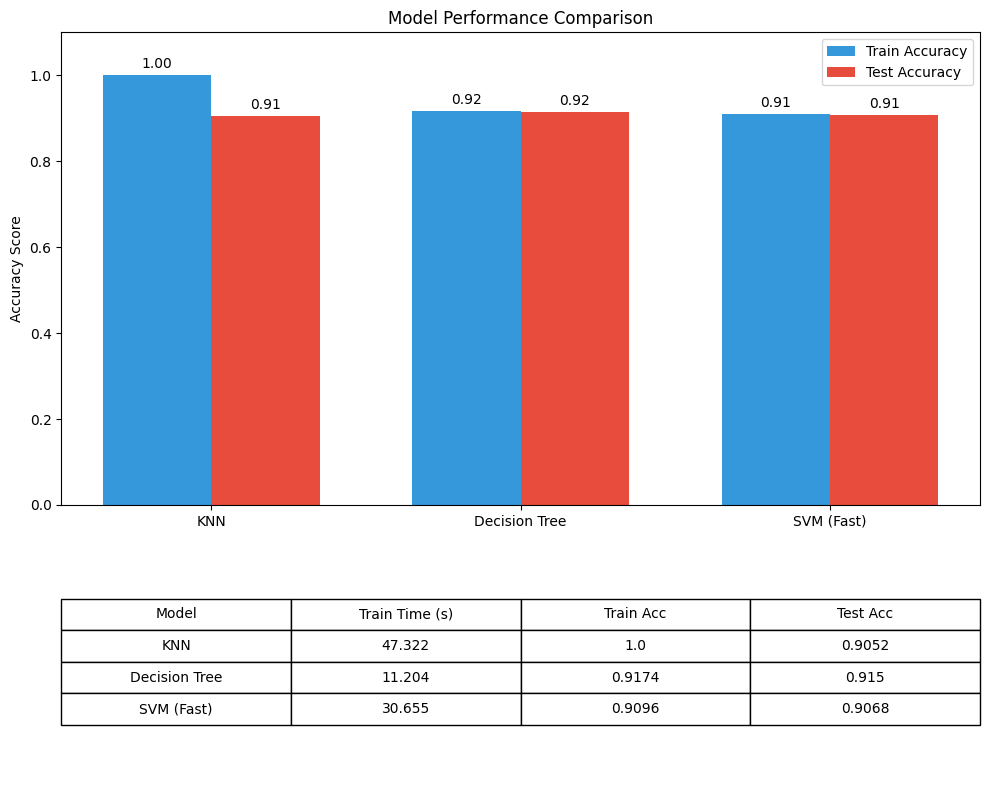

In [83]:


df = pd.DataFrame(performance_results)
models = df['Model']
train_acc = df['Train Accuracy']
test_acc = df['Test Accuracy']

# Subplots (Top for Bars, Bottom for Table)
fig, (ax_bar, ax_tbl) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

# --- Grouped Bar Chart ---
x = np.arange(len(models))
width = 0.35

rects1 = ax_bar.bar(x - width/2, train_acc, width, label='Train Accuracy', color='#3498db')
rects2 = ax_bar.bar(x + width/2, test_acc, width, label='Test Accuracy', color='#e74c3c')

ax_bar.set_ylabel('Accuracy Score')
ax_bar.set_title('Model Performance Comparison')
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(models)
ax_bar.set_ylim(0, 1.1)
ax_bar.legend(loc='upper right')

# Add values on top of bars
ax_bar.bar_label(rects1, padding=3, fmt='%.2f')
ax_bar.bar_label(rects2, padding=3, fmt='%.2f')

# --- Performance Table ---
ax_tbl.axis('off') # Hide axis for the table
table_data = df[['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy']].values
table = ax_tbl.table(cellText=table_data,
                     colLabels=['Model', 'Train Time (s)', 'Train Acc', 'Test Acc'],
                     cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

##### Questions